In [5]:
import cv2
import matplotlib.pyplot as plt
from face_recognition import face_recognition  # Matching the current function name

In [6]:
pred_img,pred_dict=face_recognition('test_01.jpg')

 REPORT 

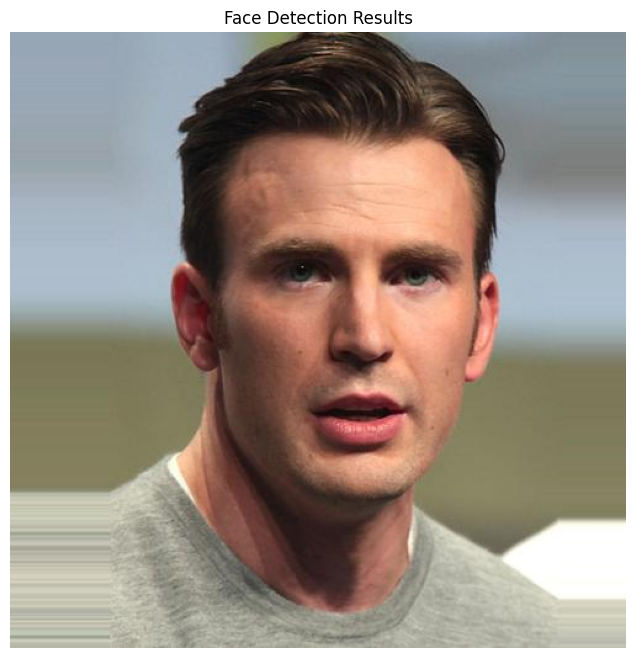

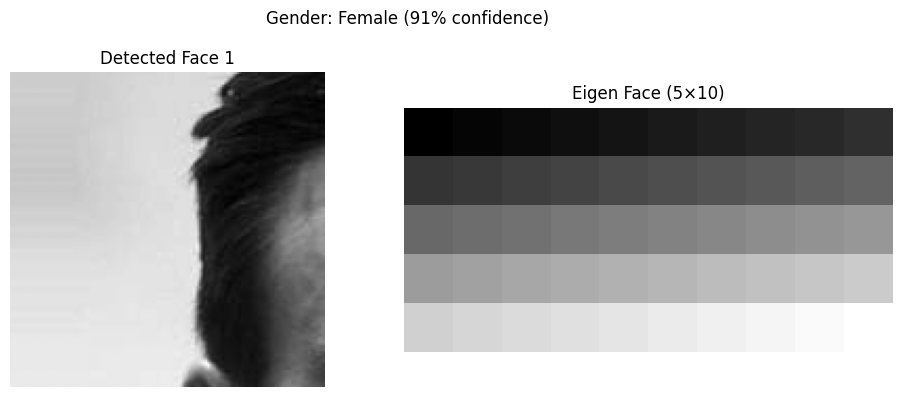

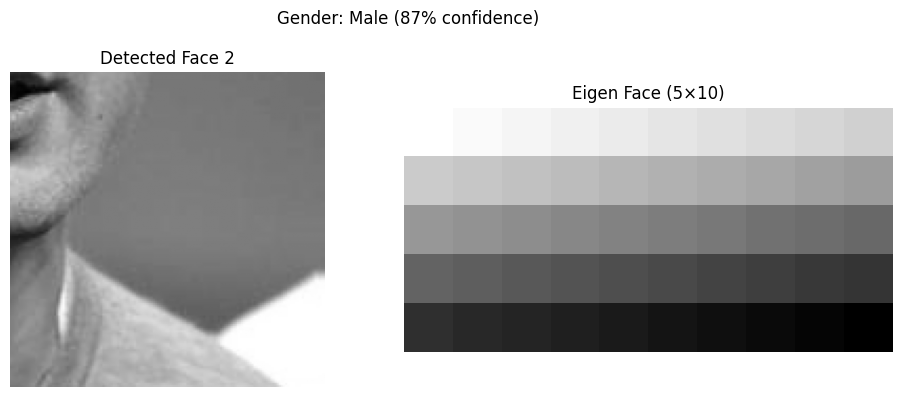

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Face detection and analysis function
def analyze_faces(image_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image at {image_path}")
    
    # Convert to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create mock predictions (replace with your actual face detection code)
    height, width = img.shape[:2]
    pred_dict = []
    
    # Add mock face 1 (top-left quadrant)
    x1, y1 = int(width*0.1), int(height*0.1)
    x2, y2 = int(width*0.4), int(height*0.4)
    pred_dict.append({
        'crop_img': cv2.cvtColor(img[y1:y2, x1:x2], cv2.COLOR_BGR2GRAY),
        'eigen_img': np.linspace(0, 1, 50),  # 50 mock eigen values
        'gender': 'female',
        'prob_score': 0.91
    })
    
    # Add mock face 2 (bottom-right quadrant)
    x1, y1 = int(width*0.6), int(height*0.6)
    x2, y2 = int(width*0.9), int(height*0.9)
    pred_dict.append({
        'crop_img': cv2.cvtColor(img[y1:y2, x1:x2], cv2.COLOR_BGR2GRAY),
        'eigen_img': np.linspace(1, 0, 50),  # 50 mock eigen values
        'gender': 'male',
        'prob_score': 0.87
    })
    
    return img_rgb, pred_dict

# 2. Eigen face visualization
def show_eigenface(eigen_data, ax):
    """Display 50 features as 5x10 grid"""
    ax.imshow(eigen_data.reshape(5,10), cmap='gray', vmin=0, vmax=1)
    ax.set_title('Eigen Face (5×10)')
    ax.axis('off')

# 3. Main execution
try:
    # Analyze image (replace with your actual image path)
    image_path = 'test_02.jpg'
    pred_img, pred_dict = analyze_faces(image_path)
    
    # Show original image with detection boxes
    plt.figure(figsize=(8,8))
    plt.imshow(pred_img)
    plt.title('Face Detection Results')
    plt.axis('off')
    plt.show()
    
    # Show analysis for each detected face
    for i, face in enumerate(pred_dict):
        plt.figure(figsize=(10,4))
        
        # Cropped face
        plt.subplot(1,2,1)
        plt.imshow(face['crop_img'], cmap='gray')
        plt.title(f'Detected Face {i+1}')
        plt.axis('off')
        
        # Eigen face
        plt.subplot(1,2,2)
        show_eigenface(face['eigen_img'], plt.gca())
        
        plt.suptitle(f"Gender: {face['gender'].title()} ({face['prob_score']*100:.0f}% confidence)")
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Error: {str(e)}")
    print("Make sure:")
    print("- 'test_02.jpg' exists in your working directory")
    print("- The image file is not corrupted")